same as v15 with larger dt, such that it takes less time to do all the sims (this is the same as v8 but rounded. )

In [1]:
import os
import subprocess as subp
import numpy as np
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import argparse
import matplotlib.colors as colors
from scipy import ndimage   
import time, math
from IPython.display import Image  
#! In the lab I need to use basic_mf but at home basic_mf_v2, since 15th July
sys.path.append("/Users/rosamartinezcorral/Google_Drive/PhD/biofilms/")
sys.path.append("/Users/rosamartinezcorral/Google_Drive/PhD/biofilms/2017_08_17_discrete_readpars/")
sys.path.append("/Users/rosamartinezcorral/Google_Drive/PhD/biofilms/2017_10_03_simple_various/")
sys.path.append("/Users/rosamartinezcorral/Google_Drive/PhD/biofilms/common_functions_2018/")
import common_functions_feb2018 as cmf2018
import functions_fitting_2017_10_02 as ffit
import matplotlib.colors as mlcolors
import common_functions as cmf
from scipy.special import binom
import itertools
import ast
import seaborn.apionly as sns
%matplotlib inline

In [2]:
figsdir='../../../../figs/biofilm_figs/spatial/'
import pandas as pd
from scipy.signal import argrelmax

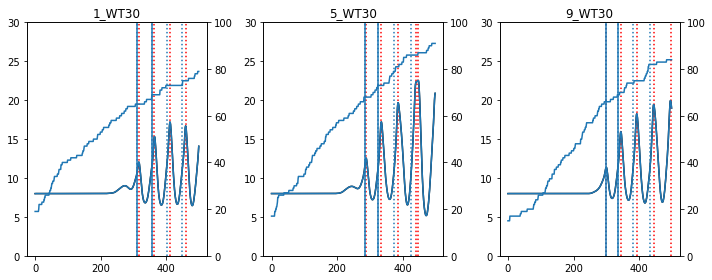

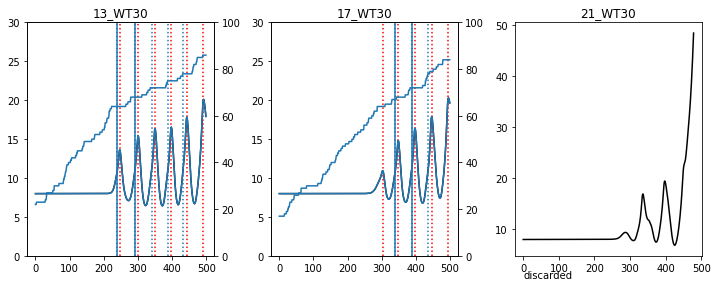

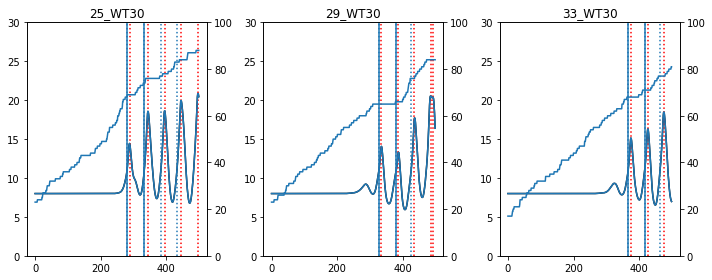

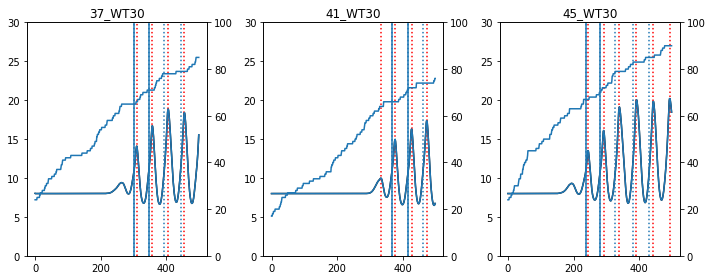

/Users/rosamartinezcorral/Google_Drive/PhD/biofilms/common_functions_2018/common_functions_feb2018.py:26: RuntimeWarning: invalid value encountered in less
  a[ data < threshold-tolerance] = -1
/Users/rosamartinezcorral/Google_Drive/PhD/biofilms/common_functions_2018/common_functions_feb2018.py:27: RuntimeWarning: invalid value encountered in greater
  a[ data > threshold+tolerance] = +1


ValueError: Image size of 712x1441435 pixels is too large. It must be less than 2^16 in each direction.

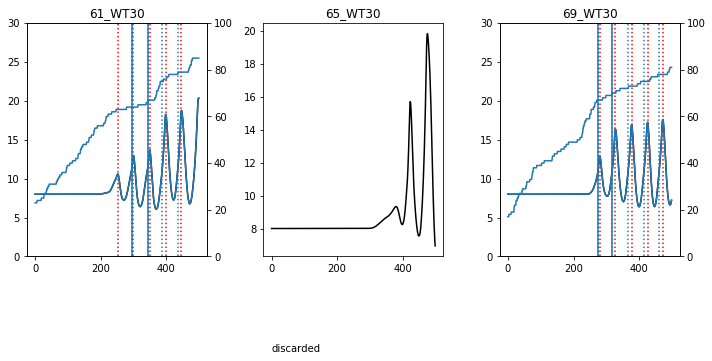

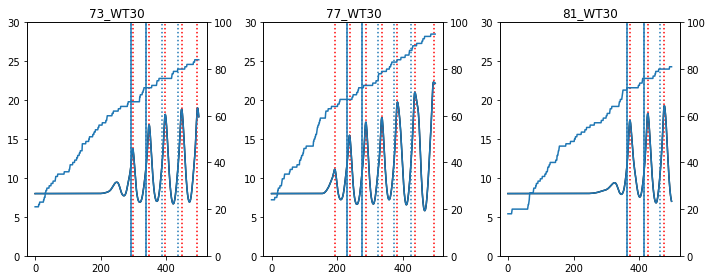

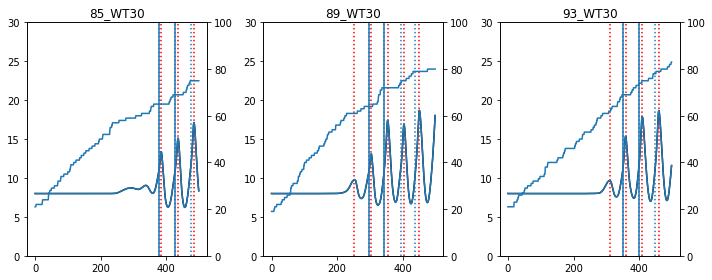

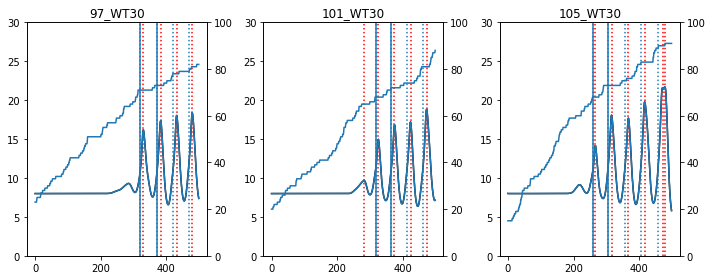

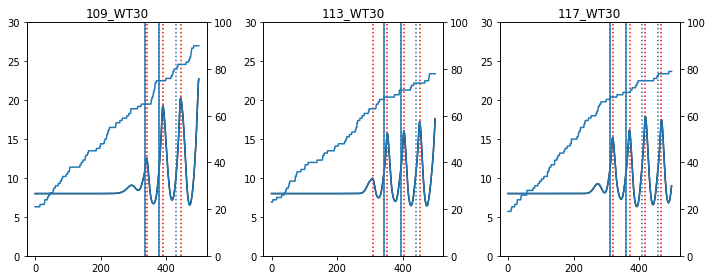

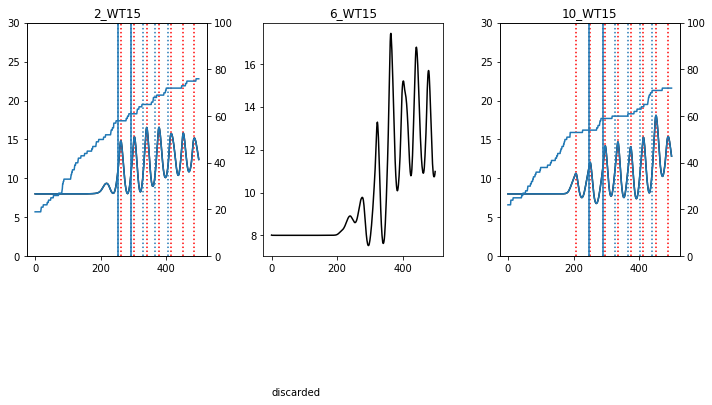

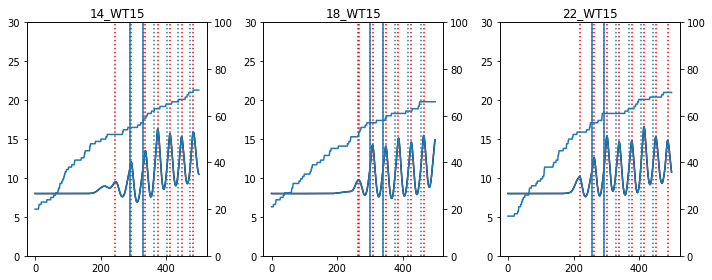

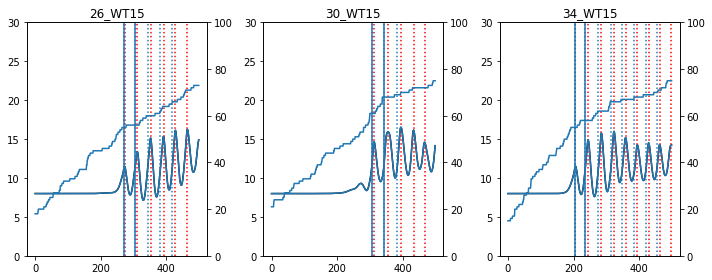

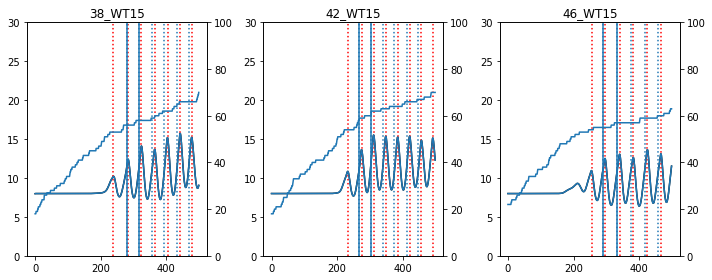

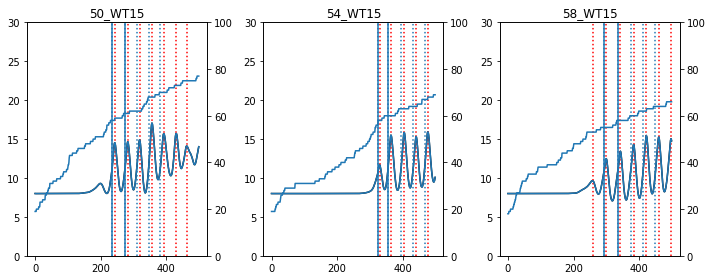

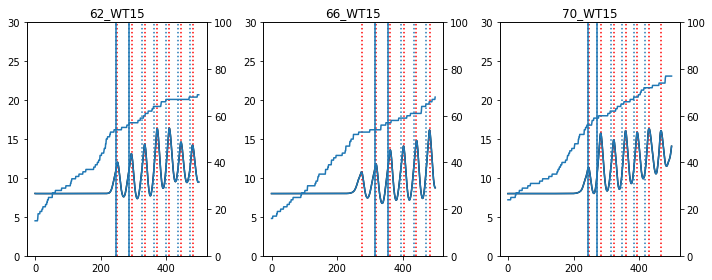

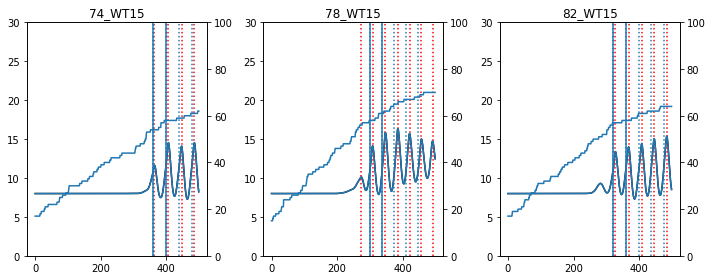

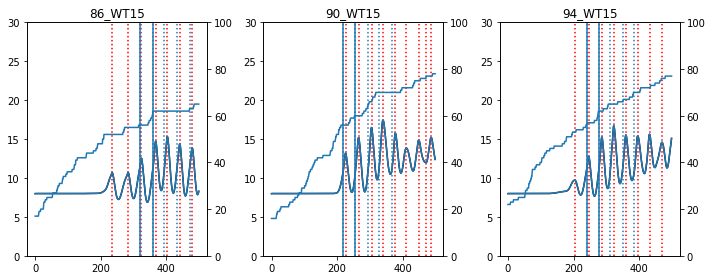

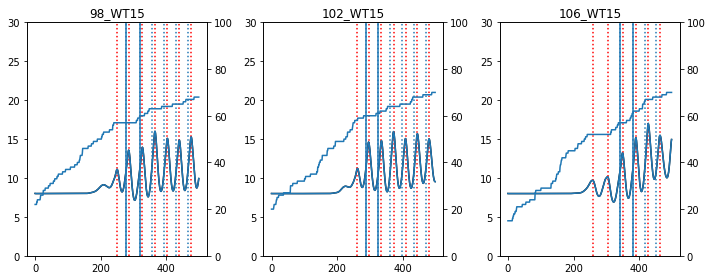

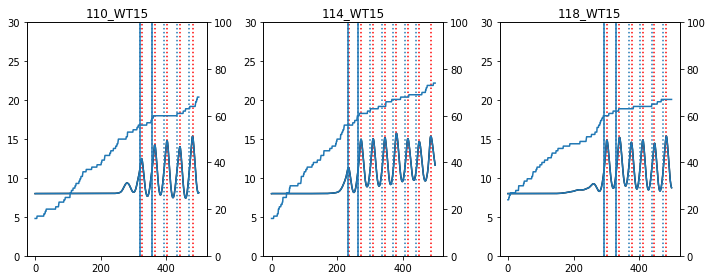

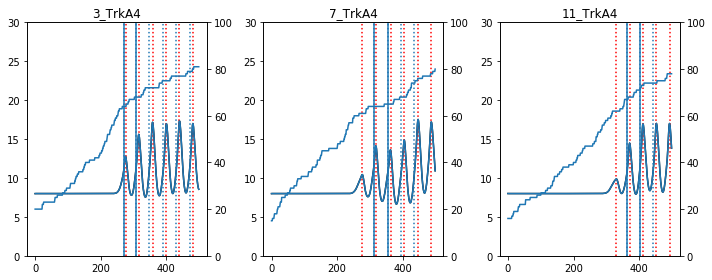

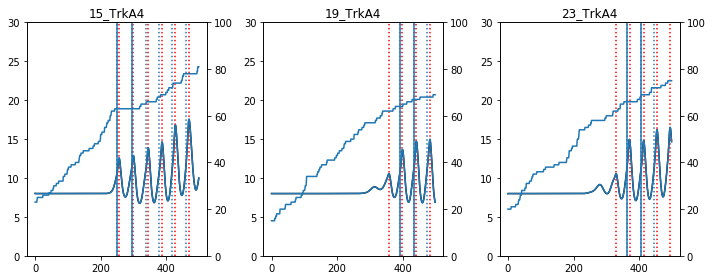

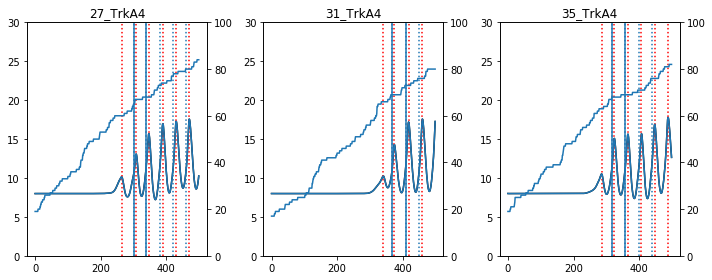

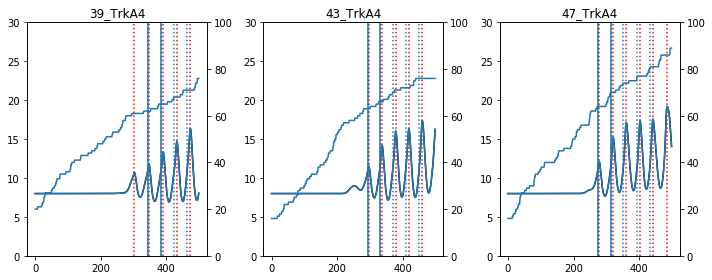

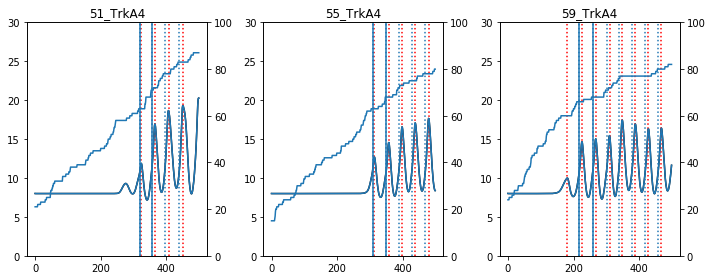

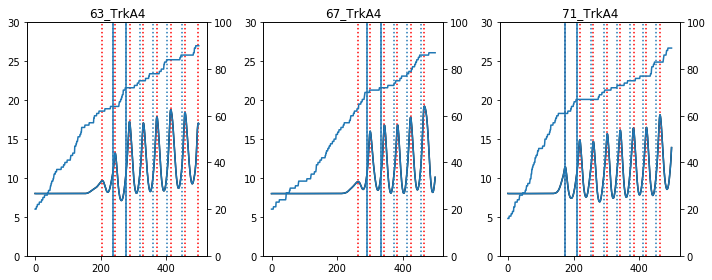

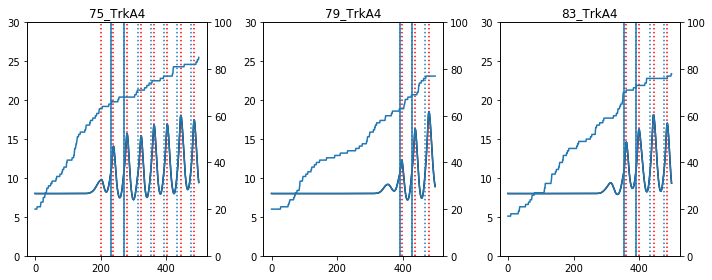

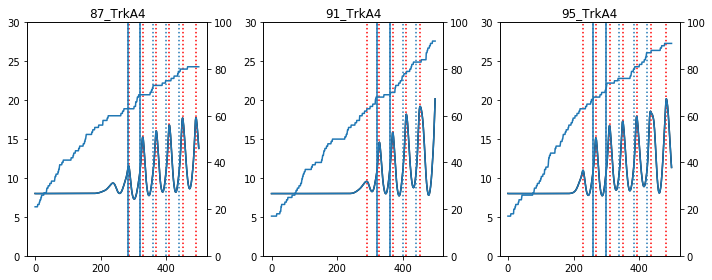

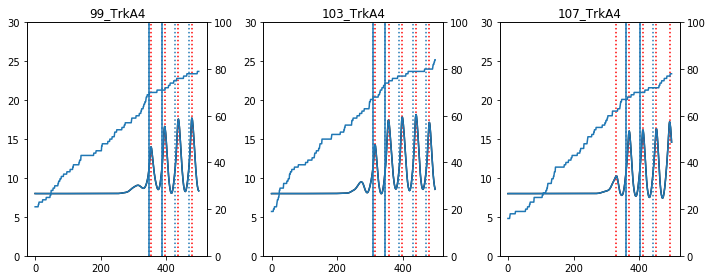

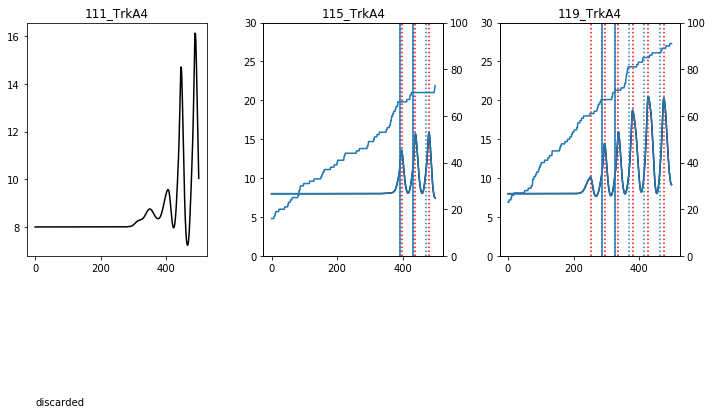

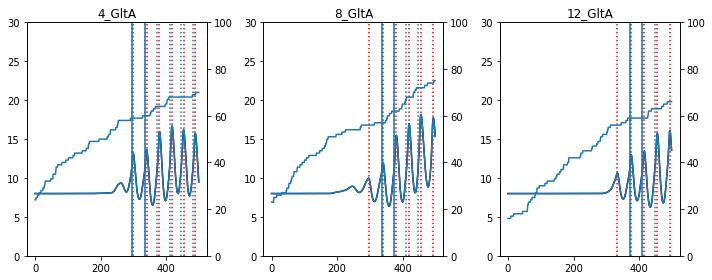

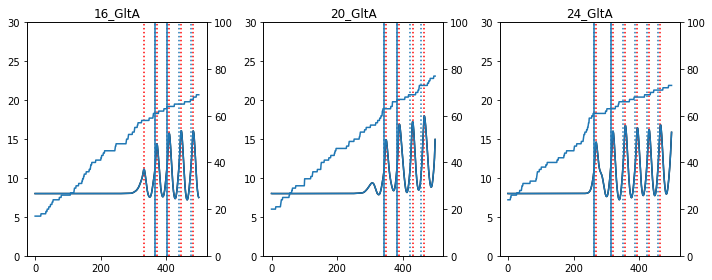

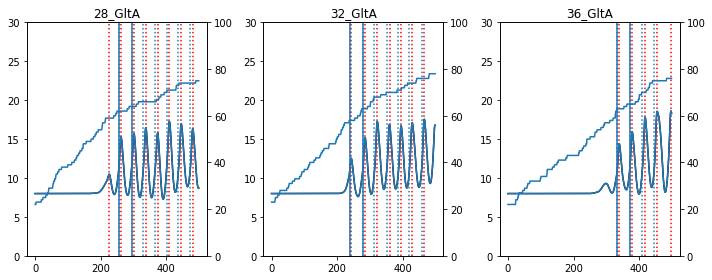

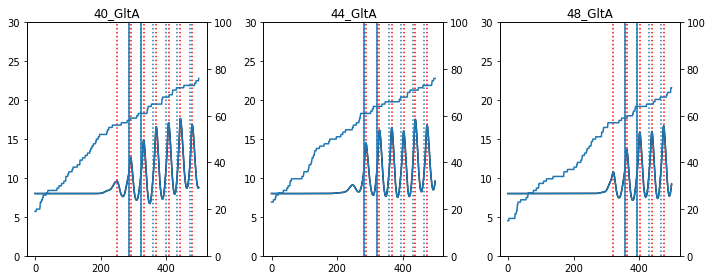

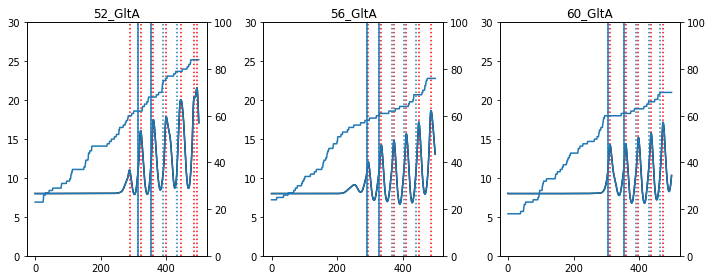

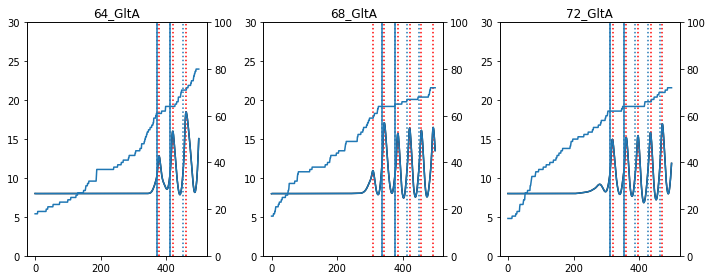

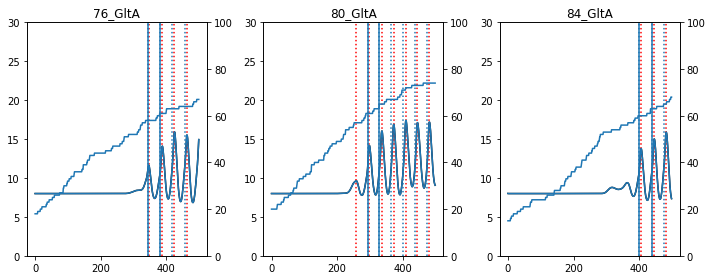

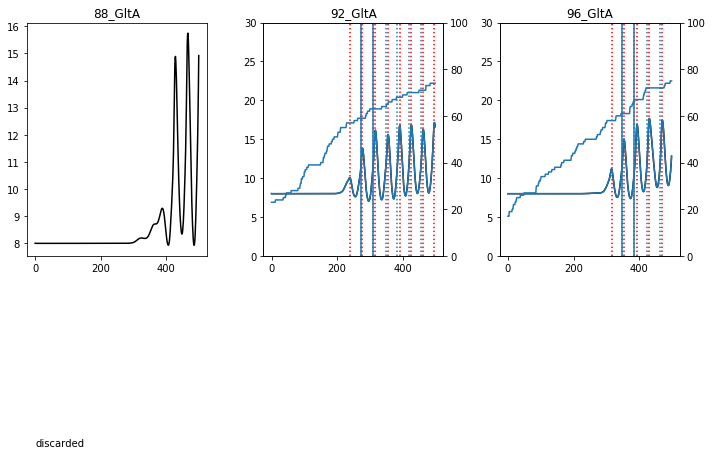

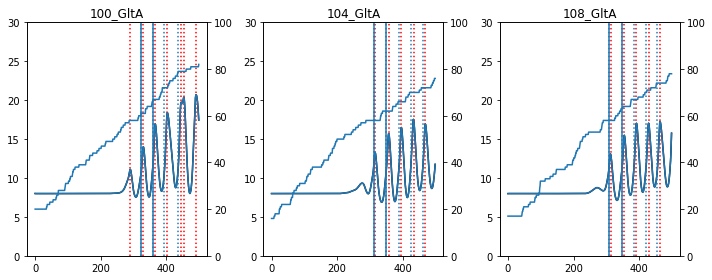

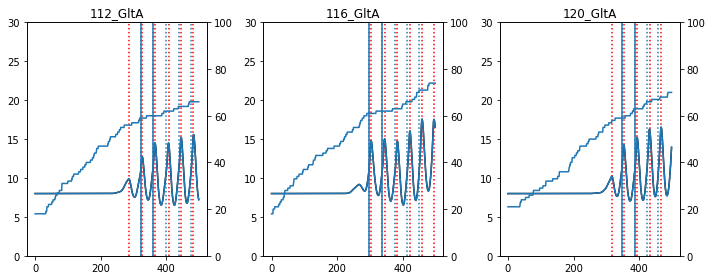

In [3]:
maxseed=120
#before I took WT3
conditions=['WT30','WT15','TrkA4','GltA'] #'TrkA', 'TrkA2','GltA3'-> not good
outdir='/Volumes/My_Passport_for_Mac/additional_data_thesis/biofilmdata/2018_05_31_DpbyGi_v16/'
st=0.05
threshold=11
transient=int(1/st)
df=pd.DataFrame() #{'initial_p':[],'first3':[],'av_p':[],'npeaks':[],'initial_s':[],'condition':[]})
df2=pd.DataFrame() #{'initial_p':[],'first3':[],'av_p':[],'npeaks':[],'initial_s':[],'condition':[]})

for c,cond in enumerate(conditions):
    
    j=-1
    for i in range(1,maxseed+1):
        
        #ip=1*c+np.random.uniform(-0.3,0.3)
        #av_p=2*c
        #npeaks=3*c
        #initial_s=4*c
        
        Ektrace=os.path.join(outdir,'Ek_%d_%s.txt'%(i,cond))
        
        if os.path.isfile(Ektrace):
            j+=1
            if j%3==0:
                if j>0:
                    plt.tight_layout()
                    plt.show()
                fig,axes=plt.subplots(1,3,figsize=(10,4))
                ax=axes[0]
            else:
                ax=axes[j%3]
            
            #ax=axes[j//3][j%3]
            Ektrace=np.loadtxt(Ektrace)
            if max(Ektrace)>50:
                Ektrace=Ektrace[0:np.where(Ektrace>50)[0][0]]
            edge=np.loadtxt(os.path.join(outdir,'edge_%d_%s.txt'%(i,cond)))
            ax.plot(Ektrace,color='k')
            ax.set_title('%i_%s'%(i,cond))
            
            #plt.show()            
           
            
            #plt.show()
            beg_end=cmf2018.identify_peaks_histeresis(Ektrace[transient:],threshold=threshold,tolerance_p=0.03) #peak identification based on normalise
            if beg_end is None or len(beg_end[0])<=2:
                ax.text(0,0.5,'discarded')
                o3_s=np.NaN
                o3_p=np.NaN
                o_p=np.NaN
                initial_s=np.NaN
                
                #these terminated in 2 are computed from the relative maxima
                o3_s2=np.NaN
                o_p2=np.NaN
                o3_p2=np.NaN
                initial_s2=np.NaN
               
            else:
                
            
                #peaks_scipy=find_peaks_cwt(Ektrace[transient:],np.array([10, 50, 100, 200,1000]),min_length=0.5*st,min_snr=1.5)
                maxs=argrelmax(Ektrace[transient:])[0]
                peaks_max=[]
                for peak in maxs:
                    #print peak
                    if Ektrace[transient:][peak]>9.5:
                        ax.axvline(x=peak+transient,color='r',linestyle=':')
                        if len(peaks_max)>0:
                            if (peak*st-peaks_max[-1]*st)>0.25:#in a couple of cases it detects two that are in fact 1
                                peaks_max.append(peak)
                        else:
                            peaks_max.append(peak)
                peaks2=np.array(peaks_max)
                if len(peaks2)>1:
                    pkt2=peaks2*st
                    periods2=np.diff(pkt2)
                    initial_s2=edge[int(peaks2[0]+transient)]*10
                    o_p2=periods2[0]
                else:
                    o_p2=np.NaN
                    initial_s2=np.NaN
                if len(peaks2)>2:
                    o3_p2=periods2[0:3].mean()
                    o3_s2=np.mean([(edge[peaks2[2]+transient]*10),initial_s2])
                else:
                    o3_p2=np.NaN
                    o3_s2=np.NaN



                beg,end=beg_end
                if len(beg)>2:

                    ax.plot(Ektrace)

                    ax.axvline(x=beg[0]+transient)
                    ax.axvline(x=beg[1]+transient)

                    for b in beg:
                        ax.axvline(x=b+transient,linestyle=':')

                    ax2=ax.twinx()
                    ax2.plot(np.arange(len(edge)),edge)
                    ax2.set_ylim([0,100])
                    ax.set_ylim([0,30])

                    pkt=beg*st
                    periods=np.diff(pkt)
                    initial_s=edge[beg[1]+transient]*10


                    #print peaks2[0], beg[0], transient, initial_s,initial_s2
                    #sys.stdout.flush()
                    #if len(periods)>1:
                    #    o_p=periods[1]
                    #else:
                    #    o_p=periods[0]
                    o_p=periods[0]
                    if o_p>3:
                        o_p=np.NaN



                    o3_s=np.mean([(edge[beg[1]+transient]*10),initial_s])
                    o3_p=periods[0:2].mean()
                        
                
                    
            

            df=df.append({'o3_s':o3_s,'initial_p':o_p,'first3':o3_p,'initial_s':initial_s,'condition':cond},ignore_index=True)

            df2=df2.append({'o3_s2':o3_s2,'initial_p':o_p2,'first3':o3_p2,'initial_s':initial_s2,'condition':cond},ignore_index=True)

    plt.tight_layout()
    plt.show()

In [4]:
df_gb=df.groupby('condition')

In [5]:
period_wt = [
    """
    2.83
    3.33
    3.00
    3.33
    3.17
    3.17
    1.83
    2.67
    3.67
    3.17
    2.67
    2.67
    2.17
    2.00
    2.00
    1.83
    2.00
    1.83
    4.00
    3.50
    """
];

#0.5x glutamate
period_wt2 = [
    """
    2.00
    2.50
    2.33
    1.00
    1.17
    1.83
    1.83
    1.67
    2.50
    2.67
    3.17
    1.50
    1.50
    1.67
    2.00
    1.50
    1.67
    1.67
    1.83
    1.83
    2.00
    1.83
    1.67
    1.50
    """
];

period_trkA = [
    """
    2.33
    2.17
    2.67
    1.33
    1.67
    2.50
    2.50
    1.33
    1.33
    1.17
    1.80
    1.97
    """
];


period_gltA = [
    """
    2.50
    1.67
    1.67
    1.67
    2.17
    2.00
    1.67
    2.33
    2.67
    2.33
    2.33
    2.17
    2.17
    1.33
    1.67
    2.50
    2.33
    1.67
    1.50
    """
];


colonyWidth_wt = [
    """
    490
    507
    442
    473
    485
    471
    477
    490
    496
    515
    426
    415
    469
    442
    450
    443
    438
    412
    485
    497
    """
];

# 0.5x glutamate
colonyWidth_wt2 = [
    """
    363
    379
    362
    370
    367
    406
    427
    362
    396
    404
    406
    291
    322
    344
    330
    306
    325
    274
    358
    370
    378
    352
    348
    323
    """
];

colonyWidth_trkA = [
    """
    447
    456
    510
    452
    472
    490
    478
    412
    482
    461
    447
    487
    """
    ];


colonyWidth_gltA = [
    """
    418
    394
    421
    387
    401
    412
    349
    402
    353
    451
    357
    353
    319
    368
    391
    427
    466
    361
    378
    """
    ];

wt_s=map(int, colonyWidth_wt[0].strip().split('\n'))
wt_p=map(float, period_wt[0].strip().split('\n'))
wt_05s=map(int, colonyWidth_wt2[0].strip().split('\n'))
wt_05p=map(float, period_wt2[0].strip().split('\n'))
trkA_s=map(int, colonyWidth_trkA[0].strip().split('\n'))
trkA_p=map(float, period_trkA[0].strip().split('\n'))
gltA_s=map(int, colonyWidth_gltA[0].strip().split('\n'))
gltA_p=map(float, period_gltA[0].strip().split('\n'))
all_sizes=wt_s+wt_05s+trkA_s+gltA_s
all_periods=wt_p+wt_05p+trkA_p+gltA_p
condition=['WT30']*len(wt_s)+['WT15']*len(wt_05s)+['trkA']*len(trkA_s)+['GltA']*len(gltA_s)

df_exp=pd.DataFrame({'condition':condition,'initial_s':all_sizes,'initial_p':all_periods})


In [7]:
import matplotlib as mpl
mpl.rcParams['font.size']=18

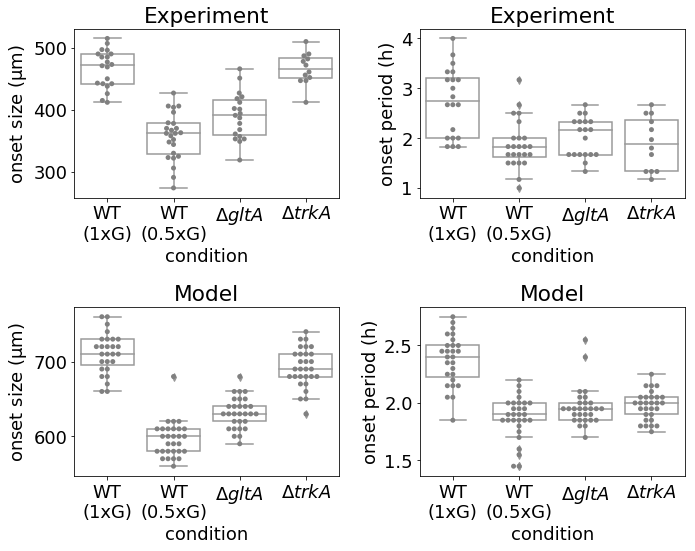

In [8]:
fig,axes=plt.subplots(2,2,figsize=(10,8))
labels=['onset size ($\mathrm{\mu m}$)', 'onset period (h)']
for knum,key in enumerate(['initial_s','initial_p']):
    ax=axes[0][knum]
    sns.boxplot(x='condition',y=key,data=df_exp,ax=ax,order=['WT30','WT15','GltA','trkA'],color='white')
    sns.swarmplot(x='condition',y=key,data=df_exp,ax=ax,order=['WT30','WT15','GltA','trkA'],color='grey')
    ax.set_xticks(range(4))
    ax.set_xticklabels(['WT\n(1xG)','WT\n(0.5xG)','$\Delta gltA$','$\Delta trkA$'])
    ax.set_ylabel(labels[knum])
    ax.set_title('Experiment')

for knum,key in enumerate(['initial_s','initial_p']):
    ax=axes[1][knum]
    sns.boxplot(x='condition',y=key,data=df,ax=ax,order=['WT30','WT15','GltA','TrkA4'],color='white')
    sns.swarmplot(x='condition',y=key,data=df,ax=ax,order=['WT30','WT15','GltA','TrkA4'],color='grey')
    ax.set_xticks(range(4))
    ax.set_xticklabels(['WT\n(1xG)','WT\n(0.5xG)','$\Delta gltA$','$\Delta trkA$'])
    ax.set_title('Model')
    ax.set_ylabel(labels[knum])
plt.tight_layout()
plt.savefig(os.path.join(figsdir,'size_period.pdf'),bbox_inches='tight')
plt.show()

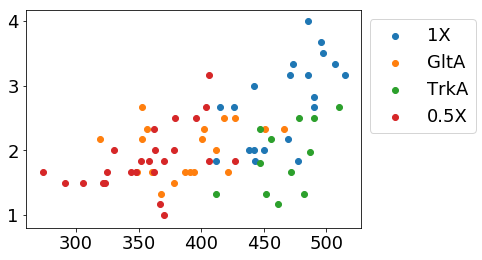

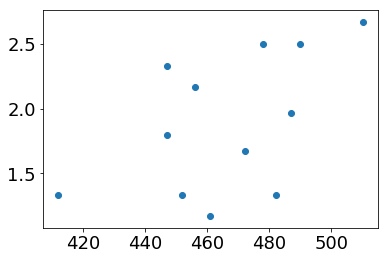

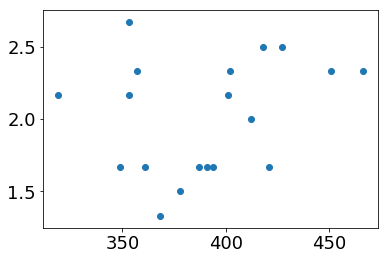

In [8]:
labels=['onset size ($\mathrm{\mu m}$)', 'onset period (h)']
df_=df_exp[df_exp['condition']=='WT30']
plt.scatter(df_.initial_s, df_.initial_p,label='1X')
df_=df_exp[df_exp['condition']=='GltA']
plt.scatter(df_.initial_s, df_.initial_p,label='GltA')
#df_=df[df['condition']=='GltA2']
#plt.scatter(df_.initial_s, df_.initial_p,label='GltA2')
df_=df_exp[df_exp['condition']=='trkA']
plt.scatter(df_.initial_s, df_.initial_p,label='TrkA')
df_=df_exp[df_exp['condition']=='WT15']
plt.scatter(df_.initial_s, df_.initial_p,label='0.5X')
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

df_=df_exp[df_exp['condition']=='trkA']
plt.scatter(df_.initial_s, df_.initial_p,label='TrkA')
plt.show()

df_=df_exp[df_exp['condition']=='GltA']
plt.scatter(df_.initial_s, df_.initial_p,label='GltA')
plt.show()

(0.75, 3)

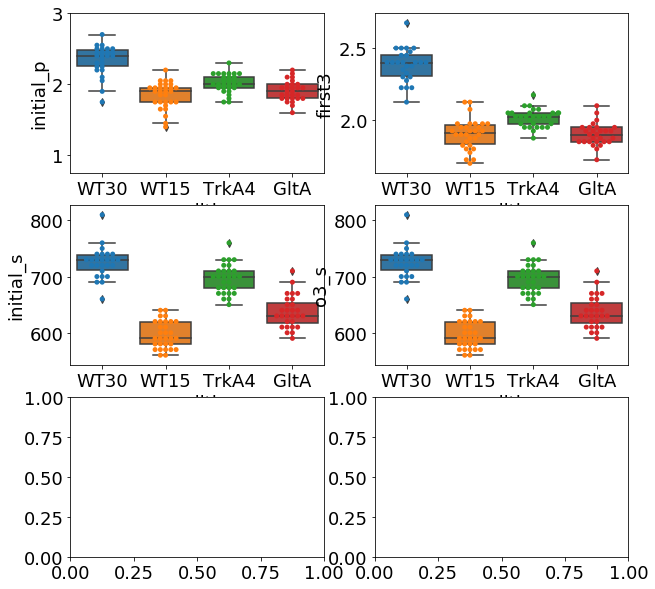

In [13]:
#in fact now as it is it is first2 
fig,axes=plt.subplots(3,2,figsize=(10,10))
for knum,key in enumerate(['initial_p','first3','initial_s','o3_s']):
    ax=axes[knum//2][knum%2]
    sns.boxplot(x='condition',y=key,data=df,ax=ax,order=['WT30','WT15','TrkA4','GltA'])
    sns.swarmplot(x='condition',y=key,data=df,ax=ax,order=['WT30','WT15','TrkA4','GltA'])
ax=axes[0][0]
ax.set_ylim([0.75,3])

In [14]:
print df2.keys()

Index([u'condition', u'first3', u'initial_p', u'initial_s', u'o3_s2'], dtype='object')


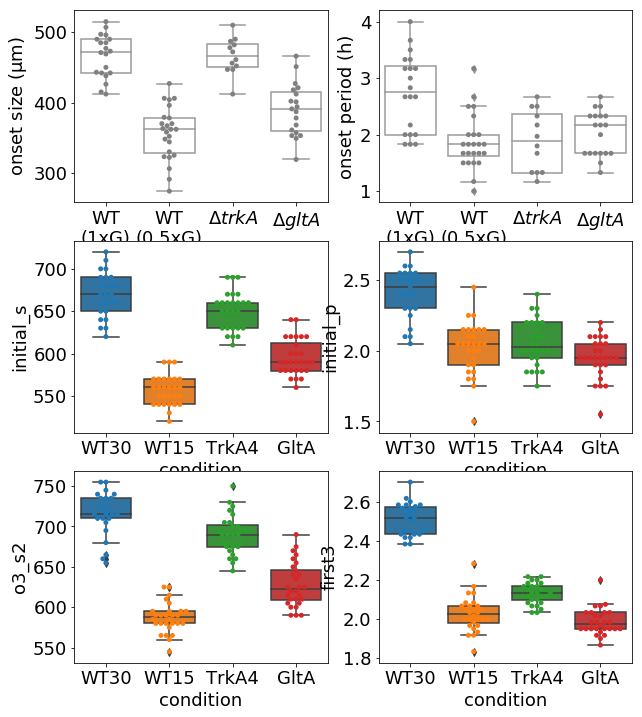

In [13]:
fig,axes=plt.subplots(3,2,figsize=(10,12))
labels=['onset size ($\mathrm{\mu m}$)', 'onset period (h)']
for knum,key in enumerate(['initial_s','initial_p']):
    ax=axes[0][knum]
    sns.boxplot(x='condition',y=key,data=df_exp,ax=ax,order=['WT30','WT15','trkA','GltA',],color='white')
    sns.swarmplot(x='condition',y=key,data=df_exp,ax=ax,order=['WT30','WT15','trkA','GltA',],color='grey')
    ax.set_xticks(range(4))
    ax.set_xticklabels(['WT\n(1xG)','WT\n(0.5xG)','$\Delta trkA$','$\Delta gltA$'])
    ax.set_ylabel(labels[knum])

for knum,key in enumerate(['initial_s','initial_p','o3_s2','first3']):
    ax=axes[1+knum//2][knum%2]
    sns.boxplot(x='condition',y=key,data=df2,ax=ax,order=['WT30','WT15','TrkA4','GltA',])
    sns.swarmplot(x='condition',y=key,data=df2,ax=ax,order=['WT30','WT15','TrkA4','GltA',])

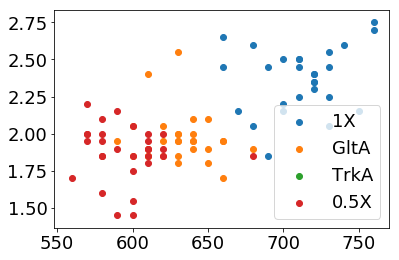

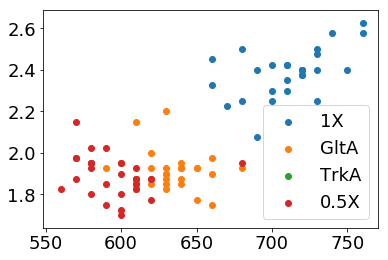

In [9]:
df_=df[df['condition']=='WT30']
plt.scatter(df_.initial_s, df_.initial_p,label='1X')
df_=df[df['condition']=='GltA']
plt.scatter(df_.initial_s, df_.initial_p,label='GltA')
#df_=df[df['condition']=='GltA2']
#plt.scatter(df_.initial_s, df_.initial_p,label='GltA2')
df_=df[df['condition']=='TrkA3']
plt.scatter(df_.initial_s, df_.initial_p,label='TrkA')
df_=df[df['condition']=='WT15']
plt.scatter(df_.initial_s, df_.initial_p,label='0.5X')
plt.legend()
plt.show()
#now look at av period and av size for first 3 peaks
df_=df[df['condition']=='WT30']
plt.scatter(df_.o3_s, df_.first3,label='1X')
df_=df[df['condition']=='GltA']
plt.scatter(df_.o3_s, df_.first3,label='GltA')
#df_=df[df['condition']=='GltA2']
#plt.scatter(df_.o3_s, df_.first3,label='GltA2')
df_=df[df['condition']=='TrkA3']
plt.scatter(df_.o3_s, df_.first3,label='TrkA')
df_=df[df['condition']=='WT15']
plt.scatter(df_.o3_s, df_.first3,label='0.5X')
plt.legend()
plt.show()

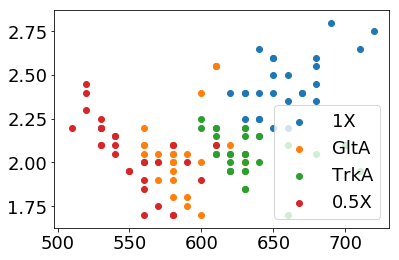

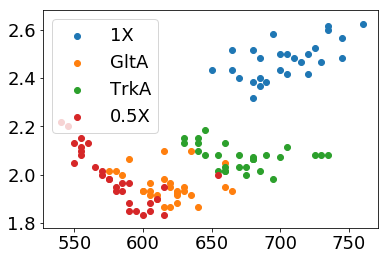

In [10]:
df2_=df2[df2['condition']=='WT30']
plt.scatter(df2_.initial_s, df2_.initial_p,label='1X')
df2_=df2[df2['condition']=='GltA']
plt.scatter(df2_.initial_s, df2_.initial_p,label='GltA')
df2_=df2[df2['condition']=='TrkA4']
plt.scatter(df2_.initial_s, df2_.initial_p,label='TrkA')
df2_=df2[df2['condition']=='WT15']
plt.scatter(df2_.initial_s, df2_.initial_p,label='0.5X')
plt.legend()
plt.show()
#now look at av period and av size for first 2 peaks
df2_=df2[df2['condition']=='WT30']
plt.scatter(df2_.o3_s2, df2_.first3,label='1X')
df2_=df2[df2['condition']=='GltA']
plt.scatter(df2_.o3_s2, df2_.first3,label='GltA')
df2_=df2[df2['condition']=='TrkA4']
plt.scatter(df2_.o3_s2, df2_.first3,label='TrkA')
df2_=df2[df2['condition']=='WT15']
plt.scatter(df2_.o3_s2, df2_.first3,label='0.5X')
plt.legend()
plt.show()

In [ ]:
However there is anticorrelation in this plots!! Try with a bit more F

In [56]:
output_dir='outs_sims/out_2_WT30'

rs=cmf2018.parse_results_intonumpy_dtype(output_dir=output_dir,basename='out_name',varlist=['c','Ek','ThT'],dtype='d')


Getting c
# 200 480
Getting Ek
# 200 480
Getting ThT
# 200 480


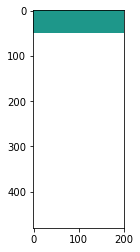

In [59]:
plt.imshow(rs[1])
plt.show()

In [60]:
np.isnan(rs[1])

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)